# <span style="color:lightgreen"> Data Analyse: Apple quality

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

C:\Users\talia\AppData\Local\Temp\ipykernel_10976\554432839.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## <span style="color:lightgreen"> Dataset inlezen

In [3]:
dataset = pd.read_csv('Data/apple_quality.csv')
dataset.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


## <span style="color:lightgreen"> Stap 1: Uitschieters & foutieve waarden verwijderen

In [4]:
dataset.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


Je zou kunnen denken dat al deze negatieve waarden fout zijn, maar deze zijn aanwezig omdat er een scaler op is toegepast. Hierdoor kunnen we ook concluderen dat er geen uitschieters meer aanwezig zullen zijn. We verwijderen wel de kolom A_id, want deze is overbodig.

In [5]:
dataset.drop('A_id', axis=1, inplace=True)
dataset.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


## <span style="color:lightgreen"> Stap 2: Ontbrekende waarden verwijderen of opvullen

In [6]:
#ontbrekende waarden
dataset.isnull().sum()

Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Er zijn geen ontbrekende waarden.

## <span style="color:lightgreen"> Stap 3: Data normaliseren

In [7]:
#count quality
dataset['Quality'].value_counts()

Quality
good    2004
bad     1996
Name: count, dtype: int64

De data is genormaliseerd, er zijn bijna evenveel slechte als goede kwaliteit appels aanwezig.

## <span style="color:lightgreen"> Stap 4: One hot encoding of label encoder

In [8]:
#label encode quality
labelencoder = LabelEncoder()
dataset['Quality'] = labelencoder.fit_transform(dataset['Quality'])
dataset.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


We zetten de kolom quality om dmv. label encoden. 1 betekent goed, 0 betekent slecht.

## <span style="color:lightgreen"> Plot1: Histogram

Text(0.5, 1.0, 'Pairplot of the dataset')

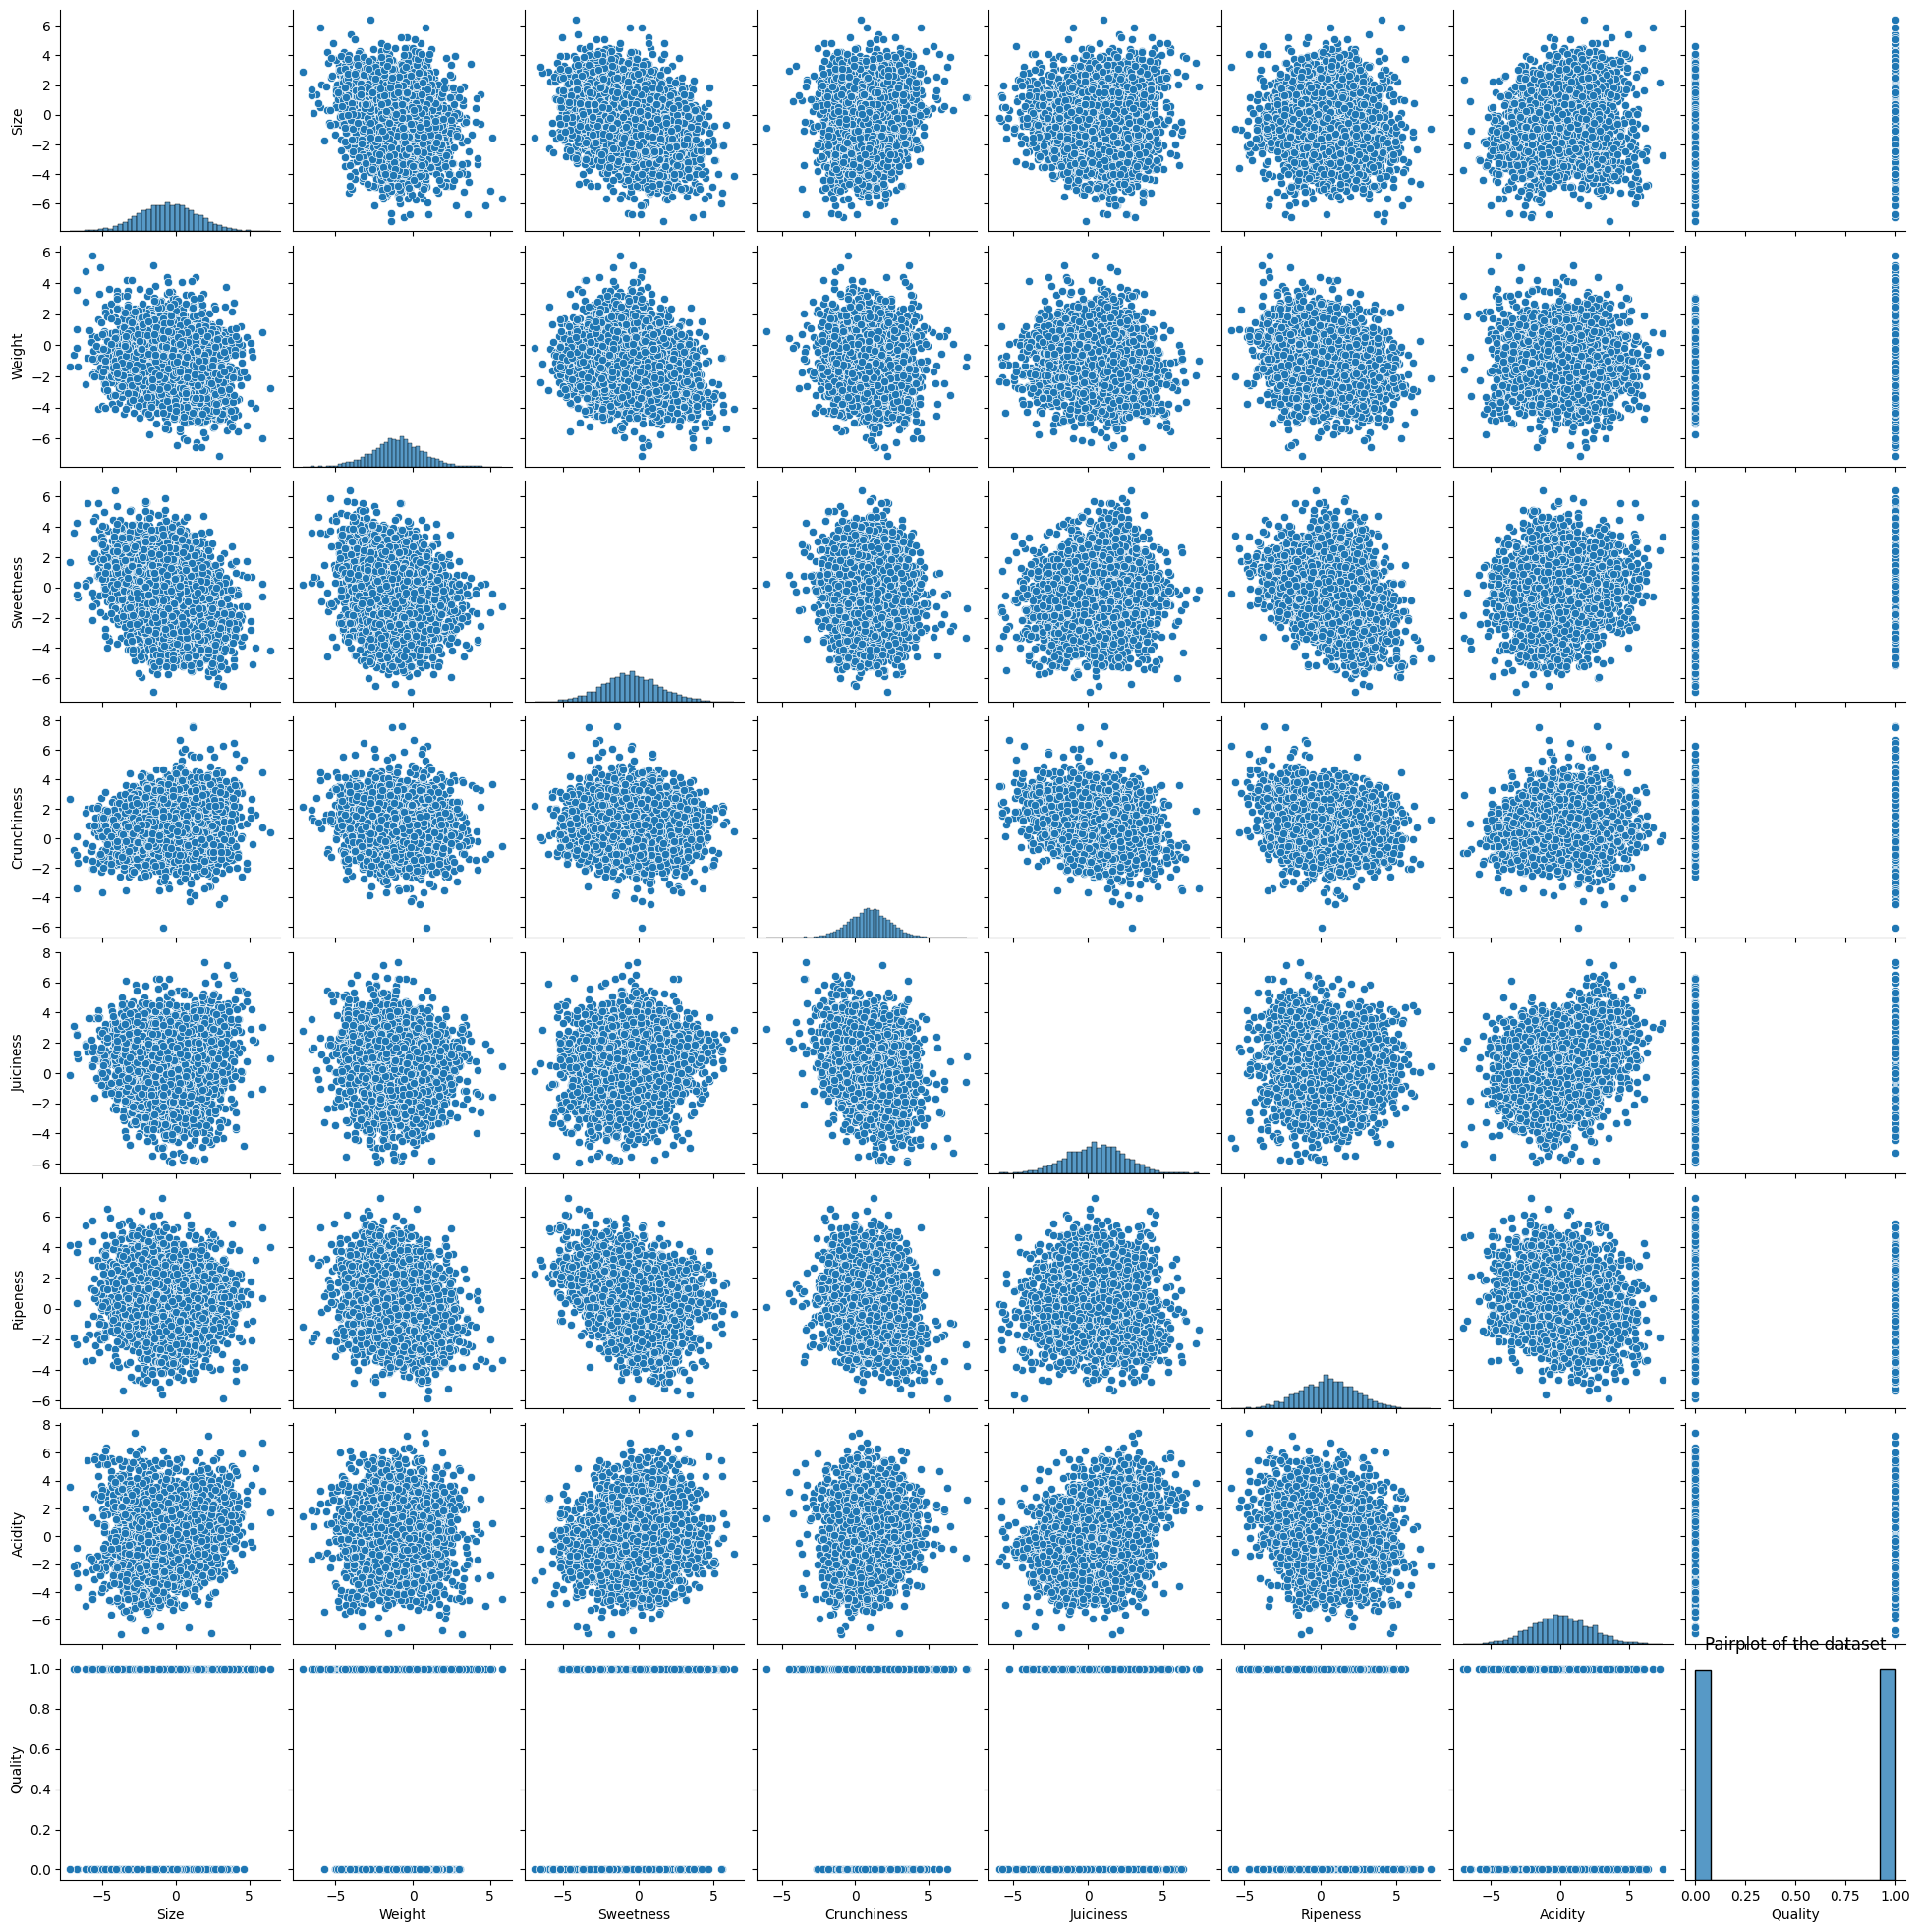

In [9]:
sns.pairplot(dataset)
plt.title('Pairplot of the dataset')

We kunnen aan de hand van deze pairplot duidelijk zien dat de kwaliteit normaal verdeeld is. De curve bij kwaliteit is bijne volledig symmetrisch rond het centrum.

## <span style="color:lightgreen"> Plot 2: Countplot

Text(0.5, 1.0, 'Countplot of the quality')

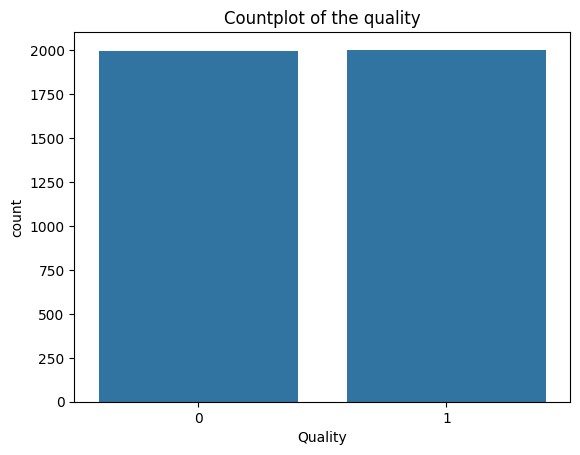

In [10]:
sns.countplot(dataset, x='Quality')
plt.title('Countplot of the quality')

Ook hier kunnen we duidelijk zien dat de dataset genormaliseerd is.

## <span style="color:lightgreen"> Plot 3: Boxplot

Text(0.5, 1.0, 'Boxplots of the features of the dataset')

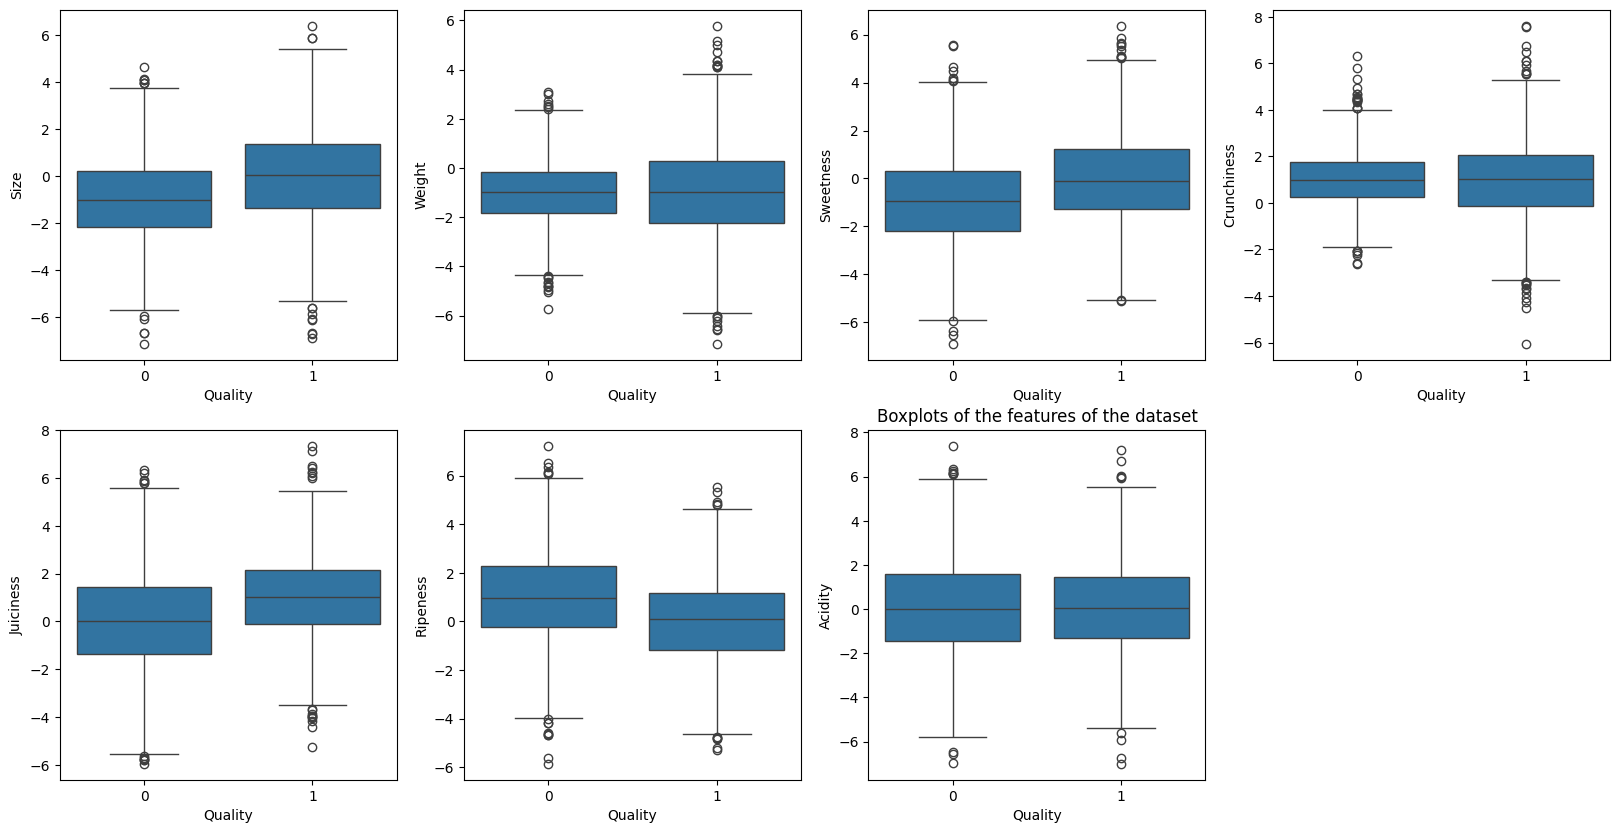

In [11]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(dataset.columns[:-1]):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='Quality', y=col, data=dataset)

plt.title('Boxplots of the features of the dataset')

We zien dat maar weinig uitschieters aanwezig zijn en dat er geen afwijkingen zijn.

## <span style="color:lightgreen"> Plot 4: Lijngrafiek

Text(0, 0.5, 'Size')

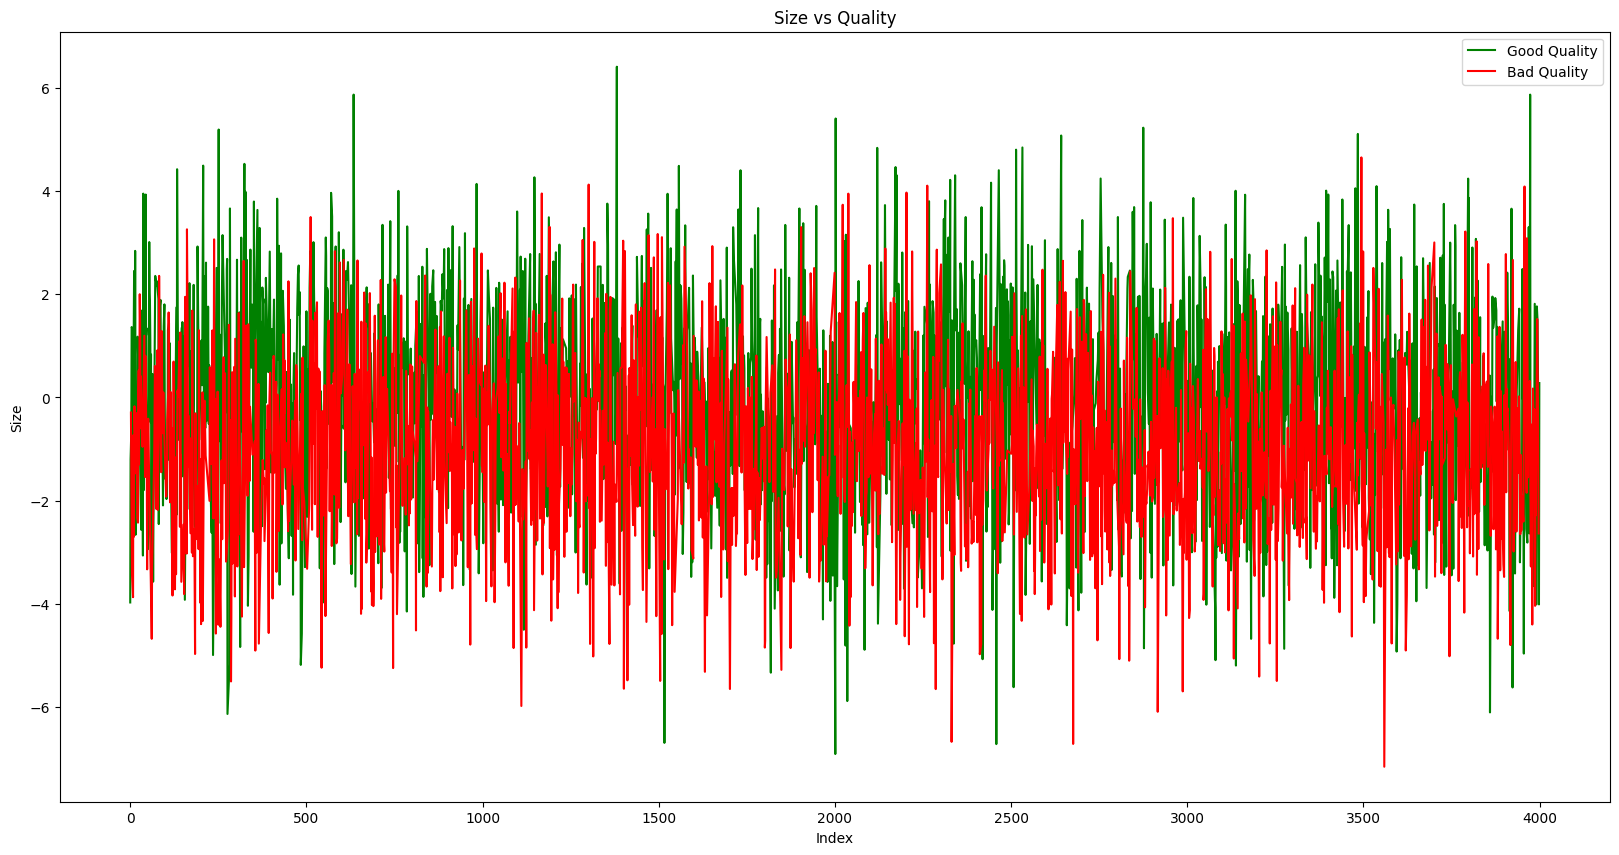

In [12]:
goodQuality = dataset[dataset['Quality'] == 1]
badQuality = dataset[dataset['Quality'] == 0]

plt.figure(figsize=(20, 10))
plt.plot(goodQuality['Size'], 'g', label='Good Quality')
plt.plot(badQuality['Size'], 'r', label='Bad Quality')
plt.legend()
plt.title('Size vs Quality')
plt.xlabel('Index')
plt.ylabel('Size')


Op deze grafiek zie je hoe veel de grootte van een appel bepaalt of deze appel goed of slecht is